# Analysis of Listing scores

In this last section of Data Analysis, we are focusing on listings scores according to the quality of the service. Cleanliness, location bookings, checkin and comunication with hosts are evaluated by guests in a scale from 1 to 10. 

In [1]:
import gzip
import json
import csv
import pandas as pd
import numpy as np
from scipy import stats
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
listing = pd.read_csv('../Data/raw/listings.csv.gz', 
                      compression='gzip',
                      error_bad_lines=False, 
                      low_memory=False)

In [3]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

Selecting the columns associated with evaluation of listings:

In [4]:
reviews = listing.loc[:, 'number_of_reviews':'review_scores_value']

And including ID, neighborhood, room and property type to identify every one:

In [5]:
df_id = listing.loc[:, ['id', 'neighbourhood_cleansed', 'room_type', 'property_type']]

In [6]:
df_reviews = pd.concat([df_id, reviews,], axis=1, sort=False)

In [7]:
df_reviews.head()

,id,neighbourhood_cleansed,room_type,property_type,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2818,Oostelijk Havengebied - Indische Buurt,Private room,Apartment,277,29,2009-03-30,2019-11-21,98.0,10.0,10.0,10.0,10.0,9.0,10.0
1,20168,Centrum-Oost,Private room,Townhouse,306,71,2010-03-02,2019-12-05,89.0,10.0,10.0,10.0,10.0,10.0,9.0
2,25428,Centrum-West,Entire home/apt,Apartment,3,2,2018-01-21,2019-05-11,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3,27886,Centrum-West,Private room,Houseboat,206,35,2012-01-09,2019-11-11,99.0,10.0,10.0,10.0,10.0,10.0,10.0
4,28871,Centrum-West,Private room,Apartment,318,105,2010-08-22,2019-11-23,98.0,10.0,10.0,10.0,10.0,10.0,10.0


### Review Scores Rating by room types, property types and neighborhoods

Firstly, we inspect a boxplot of the rating score to know the lower and upper intervals. The scale in this case is between 0 and 100, but surprisingly almost all data is concentrated **between 80 and 100 scores**. Well done, Airbnb! The quality of the service that hosts offer to guests seems to be fantastic! 

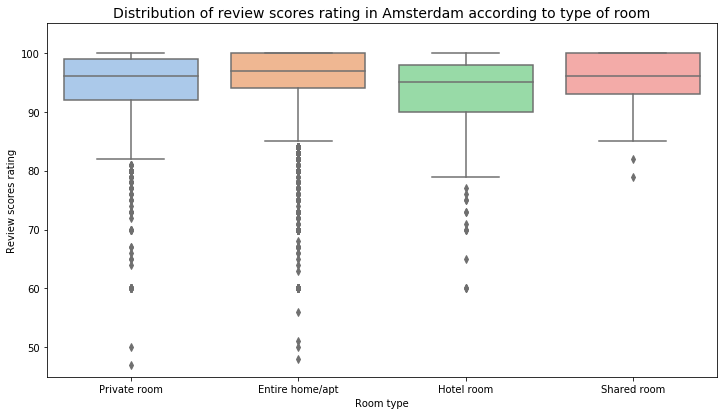

In [8]:
_ = plt.figure(figsize=(12, 6.5))
_ = sns.boxplot(y = 'review_scores_rating', x='room_type', data=df_reviews, palette='pastel')
_ = plt.ylabel('Review scores rating')
_ = plt.xlabel('Room type')
_ = plt.title('Distribution of review scores rating in Amsterdam according to type of room', size=14)
_ = plt.ylim(45, 105)

In [9]:
properties = df_reviews.groupby('property_type').count().id > 300

In [10]:
property_list = list(properties[properties == True].index)

In [11]:
property_list

['Apartment',
 'Bed and breakfast',
 'Boat',
 'Condominium',
 'House',
 'Houseboat',
 'Loft',
 'Townhouse']

In [12]:
df_reviews_filtering_properties = df_reviews[df_reviews.property_type.isin(property_list)]

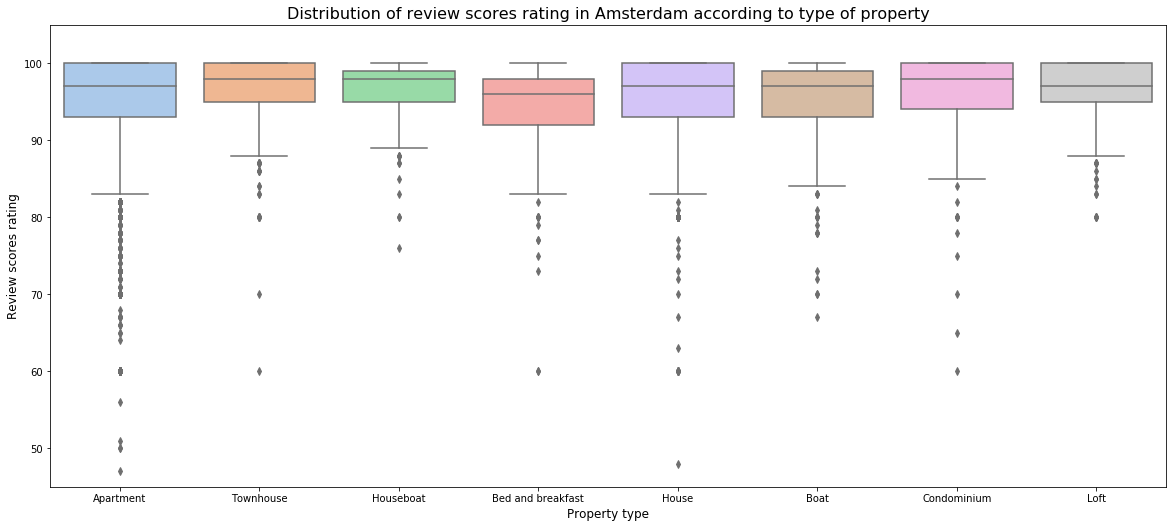

In [13]:
_ = plt.figure(figsize=(20, 8.5))
_ = sns.boxplot(y ='review_scores_rating', x='property_type', data=df_reviews_filtering_properties, palette='pastel')
_ = plt.ylabel('Review scores rating', size=12)
_ = plt.xlabel('Property type', size=12)
_ = plt.title('Distribution of review scores rating in Amsterdam according to type of property', size=16)
_ = plt.ylim(45, 105)

In [14]:
neighborhood = df_reviews.groupby('neighbourhood_cleansed').count().id > 1000

In [15]:
neighborhood_list = list(neighborhood[neighborhood == True].index)

In [16]:
neighborhood_list

['Bos en Lommer',
 'Centrum-Oost',
 'Centrum-West',
 'De Baarsjes - Oud-West',
 'De Pijp - Rivierenbuurt',
 'Oud-Oost',
 'Westerpark',
 'Zuid']

In [17]:
df_reviews_filtering_neighborhood = df_reviews[df_reviews.neighbourhood_cleansed.isin(neighborhood_list)]

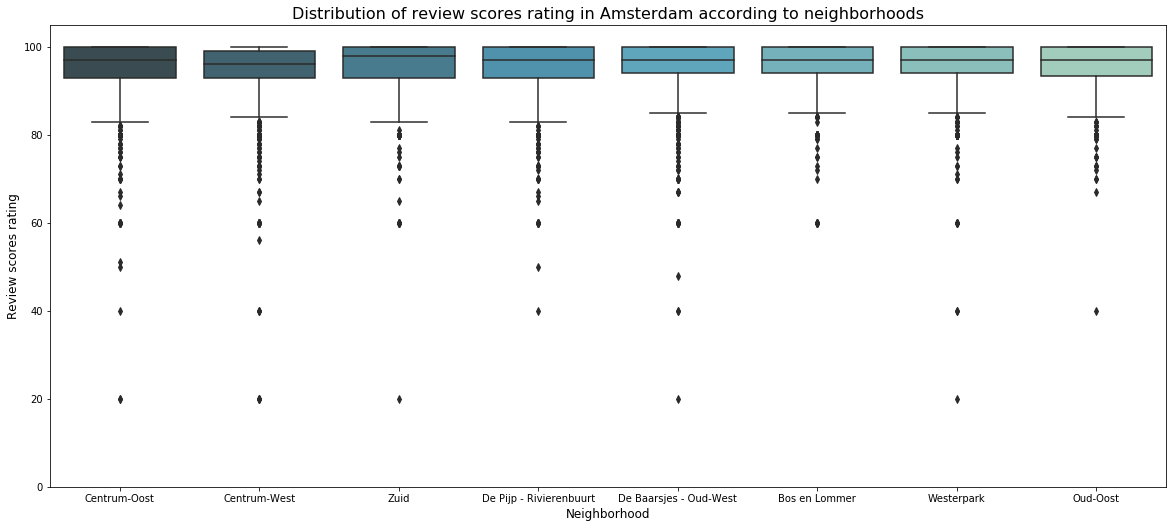

In [18]:
_ = plt.figure(figsize=(20, 8.5))
_ = sns.boxplot(y ='review_scores_rating', x='neighbourhood_cleansed', data=df_reviews_filtering_neighborhood, palette='GnBu_d')
_ = plt.ylabel('Review scores rating', size=12)
_ = plt.xlabel('Neighborhood', size=12)
_ = plt.title('Distribution of review scores rating in Amsterdam according to neighborhoods', size=16)
_ = plt.ylim(0, 105)

### Review Scores by accuracy, cleanliness, checkin, communication, location and values

In [19]:
accuracy = df_reviews.groupby('review_scores_accuracy').count().number_of_reviews.reset_index().rename(columns={'review_scores_accuracy': 'scores'})

In [20]:
cleanliness = df_reviews.groupby('review_scores_cleanliness').count().number_of_reviews.reset_index().rename(columns={'review_scores_cleanliness':'scores'})

In [21]:
checkin = df_reviews.groupby('review_scores_checkin').count().number_of_reviews.reset_index().rename(columns={'review_scores_checkin':'scores'})

In [22]:
communication = df_reviews.groupby('review_scores_communication').count().number_of_reviews.reset_index().rename(columns={'review_scores_communication':'scores'})

In [23]:
location = df_reviews.groupby('review_scores_location').count().number_of_reviews.reset_index().rename(columns={'review_scores_location':'scores'})

In [24]:
value = df_reviews.groupby('review_scores_value').count().number_of_reviews.reset_index().rename(columns={'review_scores_value':'scores'})

In [25]:
dfs = [accuracy, cleanliness, checkin, communication, location, value]

df_scores_merged = reduce(lambda left,right: pd.merge(left, right, how='outer', on='scores'), dfs)

In [26]:
df_scores_merged.set_index('scores', inplace=True)

In [27]:
df_scores_merged.set_axis(['accuracy_scores', 
                           'cleanliness_scores', 
                           'checkin_scores', 
                           'communication_scores', 
                           'location_scores', 
                           'value_scores'], axis=1, inplace=True)

In [28]:
df_scores_merged

,accuracy_scores,cleanliness_scores,checkin_scores,communication_scores,location_scores,value_scores
scores,,,,,,
2.0,18,26,14.0,17,6.0,17
3.0,1,2,NaN,1,NaN,1
4.0,24,37,9.0,11,5.0,22
5.0,11,19,4.0,4,2.0,17
6.0,65,151,72.0,59,93.0,151
7.0,86,199,81.0,68,79.0,197
8.0,506,1154,428.0,334,921.0,1612
9.0,3205,4894,2449.0,1980,5997.0,9095
10.0,13473,10909,14324.0,14914,10280.0,6271


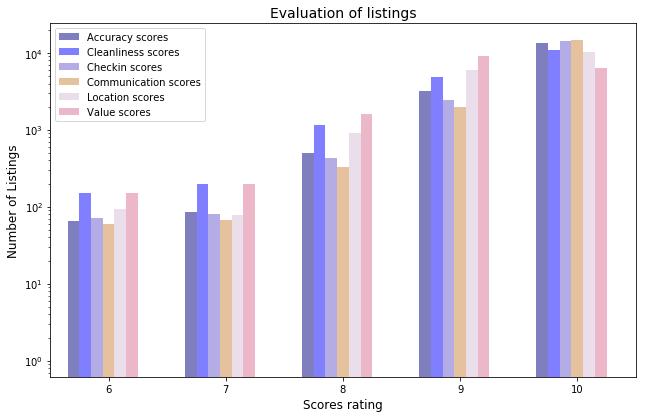

In [67]:
w = 0.1

_ = plt.figure(figsize=(10.5, 6.5))
_ = plt.bar(df_scores_merged.index-3*w, df_scores_merged.accuracy_scores, width=w, color='navy', align='center', alpha=0.5, label='Accuracy scores')
_ = plt.bar(df_scores_merged.index-2*w, df_scores_merged.cleanliness_scores, width=w, color='blue', align='center', alpha=0.5, label='Cleanliness scores')
_ = plt.bar(df_scores_merged.index-w, df_scores_merged.checkin_scores, width=w, color='slateblue', align='center', alpha=0.5, label='Checkin scores')
_ = plt.bar(df_scores_merged.index, df_scores_merged.communication_scores, width=w, color='peru', align='center', alpha=0.5, label='Communication scores')
_ = plt.bar(df_scores_merged.index+w, df_scores_merged.location_scores, width=w, color='thistle', align='center', alpha=0.5, label='Location scores')
_ = plt.bar(df_scores_merged.index+2*w, df_scores_merged.value_scores, width=w, color='palevioletred', align='center', alpha=0.5, label='Value scores')
_ = plt.legend(loc='upper left')
_ = plt.xlim(5.5, 10.5)
_ = plt.yscale('log')
_ = plt.xlabel('Scores rating', size=12)
_ = plt.ylabel('Number of Listings', size=12)
_ = plt.title('Evaluation of listings', size=14)

# In-depth analysis: Prediction of booking scores 

Now, using all the features possible, we will try to inference relations between them to used for the prediction of booking scores.